<a href="https://colab.research.google.com/github/Chidibobo/Ensemble-model-to-check-Churn-rates/blob/main/Churn_dataset_using_Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [5]:
!kaggle datasets download -d saurabhbadole/bank-customer-churn-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 59.4MB/s]


In [6]:
#extract dataset from kaggle
import zipfile

zip_file_path = '/content/bank-customer-churn-prediction-dataset.zip'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#load data
df = pd.read_csv('/content/Churn_Modelling.csv')

# Drop unnecessary columns
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder objects
le_geography = LabelEncoder()
le_gender = LabelEncoder()

# Fit and transform the columns
df1['Geography_Encoded'] = le_geography.fit_transform(df1['Geography'])
df1['Gender_Encoded'] = le_gender.fit_transform(df1['Gender'])

# Drop the original columns if needed
df1 = df1.drop(['Geography', 'Gender'], axis=1)

df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Encoded,Gender_Encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [10]:
#split the data to training and test sets
x = df1.drop('Exited', axis=1)
y = df1['Exited']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**USE ENSEMBLE TECHNIQUES TO PREDICT MORE ACCURATE CHURN RATES**

In [11]:
#perfrom ensemble techniques between logistic regression and other ml techniques

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

lr= LogisticRegression()
rf= RandomForestClassifier()
gb= GradientBoostingClassifier()
ada= AdaBoostClassifier()
bag= BaggingClassifier()

# train the model
lr = lr.fit(x_train, y_train)
rf = rf.fit(x_train, y_train)
gb = gb.fit(x_train, y_train)
ada = ada.fit(x_train, y_train)
bag = bag.fit(x_train, y_train)

#test the model
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gb = gb.predict(x_test)
y_pred_ada = ada.predict(x_test)
y_pred_bag = bag.predict(x_test)

#compare the accuracy of each model
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("GB classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Ada Boost Classifier Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bag))

Logistic Regression Accuracy: 0.807
Random Forest Classifier Accuracy: 0.8615
GB classifier Accuracy: 0.8645
Ada Boost Classifier Accuracy: 0.8615
Bagging Classifier Accuracy: 0.8595


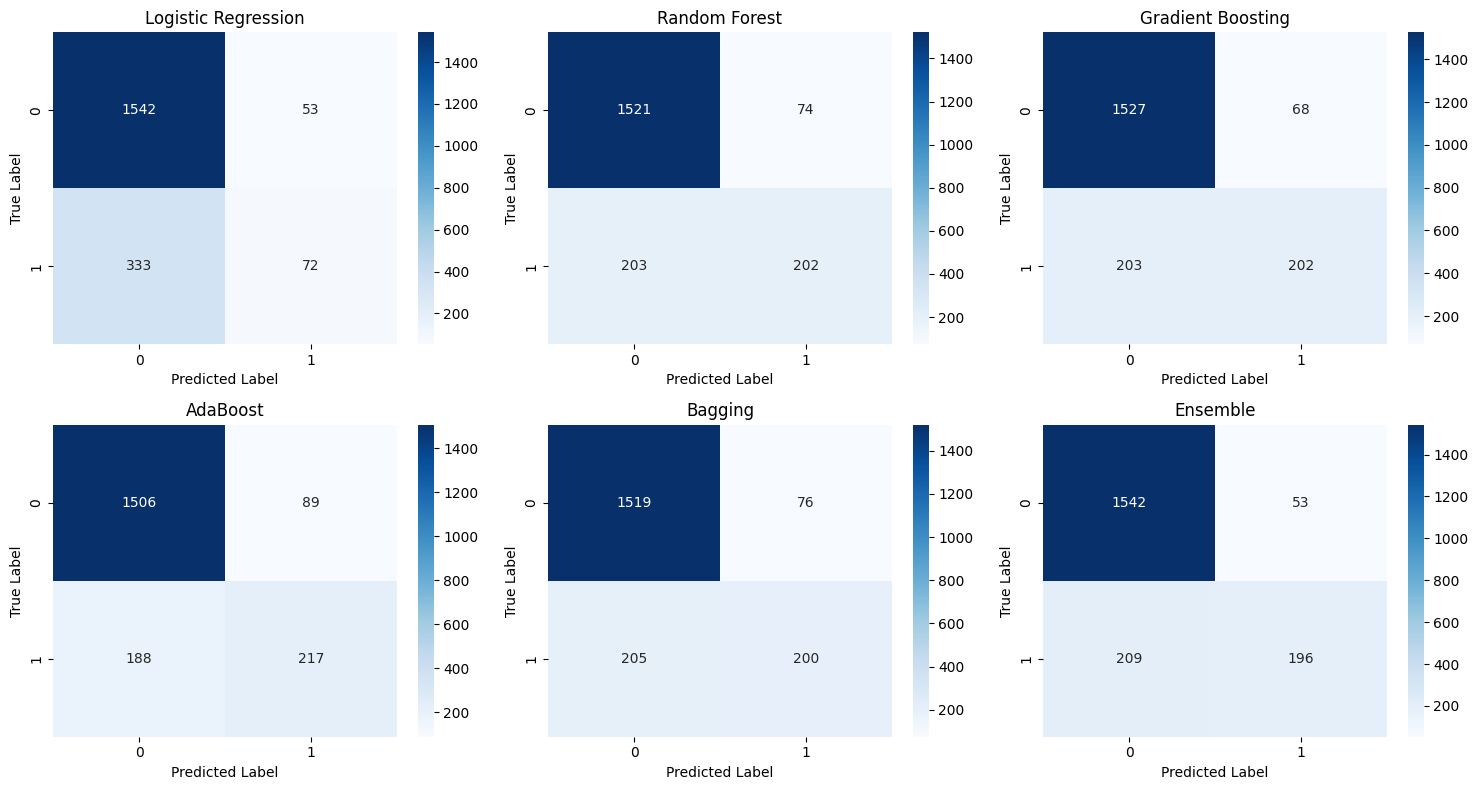

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated y_pred_* for each model
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_ada, y_pred_bag, y_pred_ensemble]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Ensemble']

# Calculate confusion matrices for each model
confusion_matrices = [confusion_matrix(y_test, y_pred) for y_pred in y_preds]

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (cm, model_name) in enumerate(zip(confusion_matrices, model_names)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr', lr), ('rf', rf), ('gb', gb), ('ada', ada), ('bag', bag)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(x_train, y_train)

y_pred_ensemble = voting_clf.predict(x_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))



Ensemble Accuracy: 0.869


**OVERALL ACCURACY HAS IMPROVED TO 86.9%**

In [15]:
#SAVE THE MODEL
import pickle
filename = 'finalized_model.sav'
pickle.dump(voting_clf, open(filename, 'wb'))